# Heat Vulnerability maps as subplots as one image 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.colorbar import ColorbarBase
import pandas as pd
import numpy as np

In [4]:
LakeYears = {'PIGEON LAKE':'2021',
            'PINE LAKE': '2017',
            'MENDOTA LAKE':'2018',
            'MONONA LAKE':'2015'}

path_temp = ['0.5', '1.5', '3.5']

In [18]:
def heatmap_value(custom_cmap = 'turbo', figsize=(12, 6),
                  FONTSIZE=7, type = 'max',
                  verbo= False):
    max_lim = 0
    min_lim = 100
    for TEMP in path_temp:
        for lake_name in LakeYears:
            path = "./Vulnerability/"+ lake_name + '/'+ LakeYears[lake_name]
            if type == 'max':
                path_data =  path + '_SSP_dE_zm_mean_' + f'{TEMP}.csv'
            elif type=='mean': 
                path_data =  path + '_SSP_dE_zm_max_' + f'{TEMP}.csv'
            Data= pd.read_csv(path_data)
            Data = Data[Data.columns[1:]]
            max_lim = max(max_lim, Data.max().max())
            min_lim = min(min_lim, Data.min().min())

    custom_cmap = custom_cmap
    # Define custom colormap colors
    num_levels_color = 7 * 4
    # Define number classes
    num_levels_line = 7 * 1
    
    
    fig, axs = plt.subplots(4, 3, figsize= figsize,layout='constrained')
    # axs = axs.ravel()

    i = 0    
    for lake_name in LakeYears.keys():
        j = 0       
        for TEMP in path_temp:    
            path = "./Vulnerability/"+ lake_name + '/'+ LakeYears[lake_name]
            if type == 'max':
                path_data =  path + '_SSP_dE_zm_mean_' + f'{TEMP}.csv'
            elif type=='mean': 
                path_data =  path + '_SSP_dE_zm_max_' + f'{TEMP}.csv'
            Data = pd.read_csv(path_data)
            Data_matrix = Data.iloc[:, 1:].values
            Z_values = list(np.around(np.arange(0, 2.75+0.035, 0.035), 2))
            d_values = list(np.around(np.arange(0.02, 0.12+0.0012, 0.0012), 4))
            DataFrame = pd.DataFrame(Data_matrix, index=d_values, columns=Z_values)
        
            x = Z_values
            y = d_values[::-1]
        
            X, Y = np.meshgrid(x, y)
        
            Z = Data_matrix
        
            # Plot heatmap with contour lines using the custom colormap
            contour_levels_colors = np.linspace(Z.min().min(), Z.max().max(), num_levels_color + 1)
            contour_levels_colors = np.linspace(min_lim, max_lim, num_levels_color + 1)
            pcm = axs[i,j].contourf(X, Y, Z, levels=contour_levels_colors, cmap=custom_cmap, vmin=min_lim, vmax=max_lim)
            # axs[i].contour(X, Y, Z, levels=num_levels_line, colors='k', alpha=0.7)
        
            axs[i,j].set_xlabel('Increase epilimnion depth $+m$', fontsize=FONTSIZE)  # Use set_xlabel instead of xlabel
            axs[i,j].set_ylabel("Water exchange rate", fontsize=FONTSIZE)  # Use set_ylabel instead of ylabel
        
            # Set ticks and labels for x and y axes
            print_Z = list(np.around(np.arange(0, 2.75 , 0.07*4), 2))
            print_Z.append(2.75)
            print_d = list(np.around(np.arange(0.02, 0.12+0.012, 0.012*2), 3))
            # print_d.append(0.08)
            print_d.reverse()
            axs[i,j].xaxis.set_ticks(print_Z)  # Use set_ticks instead of set_ticklabels
            # Assuming print_Z contains the tick values
            formatted_Z = [f'{z:.2f}' for z in print_Z]  # Format to 2 decimal places
            # Apply the formatted tick labels to the x-axis
            axs[i, j].xaxis.set_ticklabels(formatted_Z, rotation=90, fontsize=FONTSIZE)
            axs[i,j].yaxis.set_ticks(print_d)  # Use set_ticks instead of set_ticklabels
            # axs[i,j].yaxis.set_ticklabels(print_d, fontsize=FONTSIZE)
            # Assuming print_Z contains the tick values
            formatted_d = [f'{z:.2f}' for z in print_d]  # Format to 2 decimal places
            # Apply the formatted tick labels to the x-axis
            axs[i, j].yaxis.set_ticklabels(formatted_d, fontsize=FONTSIZE)
            if verbo:
                print(lake_name, TEMP, i,j)
            j = j+1
        i = i+1    
    axs[0,0].set_title('Increase in water temperature\n +0.5 °C', fontsize=FONTSIZE+2, pad = 10, fontweight='bold')
    axs[0,1].set_title('Increase in water temperature\n +1.5 °C', fontsize=FONTSIZE+2, pad = 10, fontweight='bold')
    axs[0,2].set_title('Increase in water temperature\n +3.5 °C', fontsize=FONTSIZE+2, pad = 10, fontweight='bold')

    # Titles for each of the four rows, assuming a 4x3 subplot layout
    fig.text(-0.015, 0.82, 'Pigeon lake', ha='center', rotation='vertical', fontsize=FONTSIZE+2, fontweight='bold')
    fig.text(-0.015, 0.59, 'Pine lake', ha='center', rotation='vertical', fontsize=FONTSIZE+2, fontweight='bold')
    fig.text(-0.015, 0.33, 'Mendota lake', ha='center', rotation='vertical', fontsize=FONTSIZE+2, fontweight='bold')
    fig.text(-0.015, 0.09, 'Monona lake', ha='center', rotation='vertical', fontsize=FONTSIZE+2, fontweight='bold')

    # fig.suptitle('Vulnerability index with respect to maximum microcystin-LR concentration', 
    #                 fontsize=FONTSIZE+2,fontweight='bold')
    # Create a colorbar
    cbar_ax = fig.add_axes([1.005, 0.075, 0.025, 0.87])  # [left, bottom, width, height]
    cbar = fig.colorbar(pcm, cax=cbar_ax)
    # Set the format for the colorbar ticks (e.g., 2 decimal places)
    cbar.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
    cbar.ax.tick_params(labelsize=FONTSIZE) 
    cbar.set_label('Vulnerability index', fontsize=FONTSIZE)
    
    # plt.tight_layout()
    
    return fig, axs

## Saving all the images individually

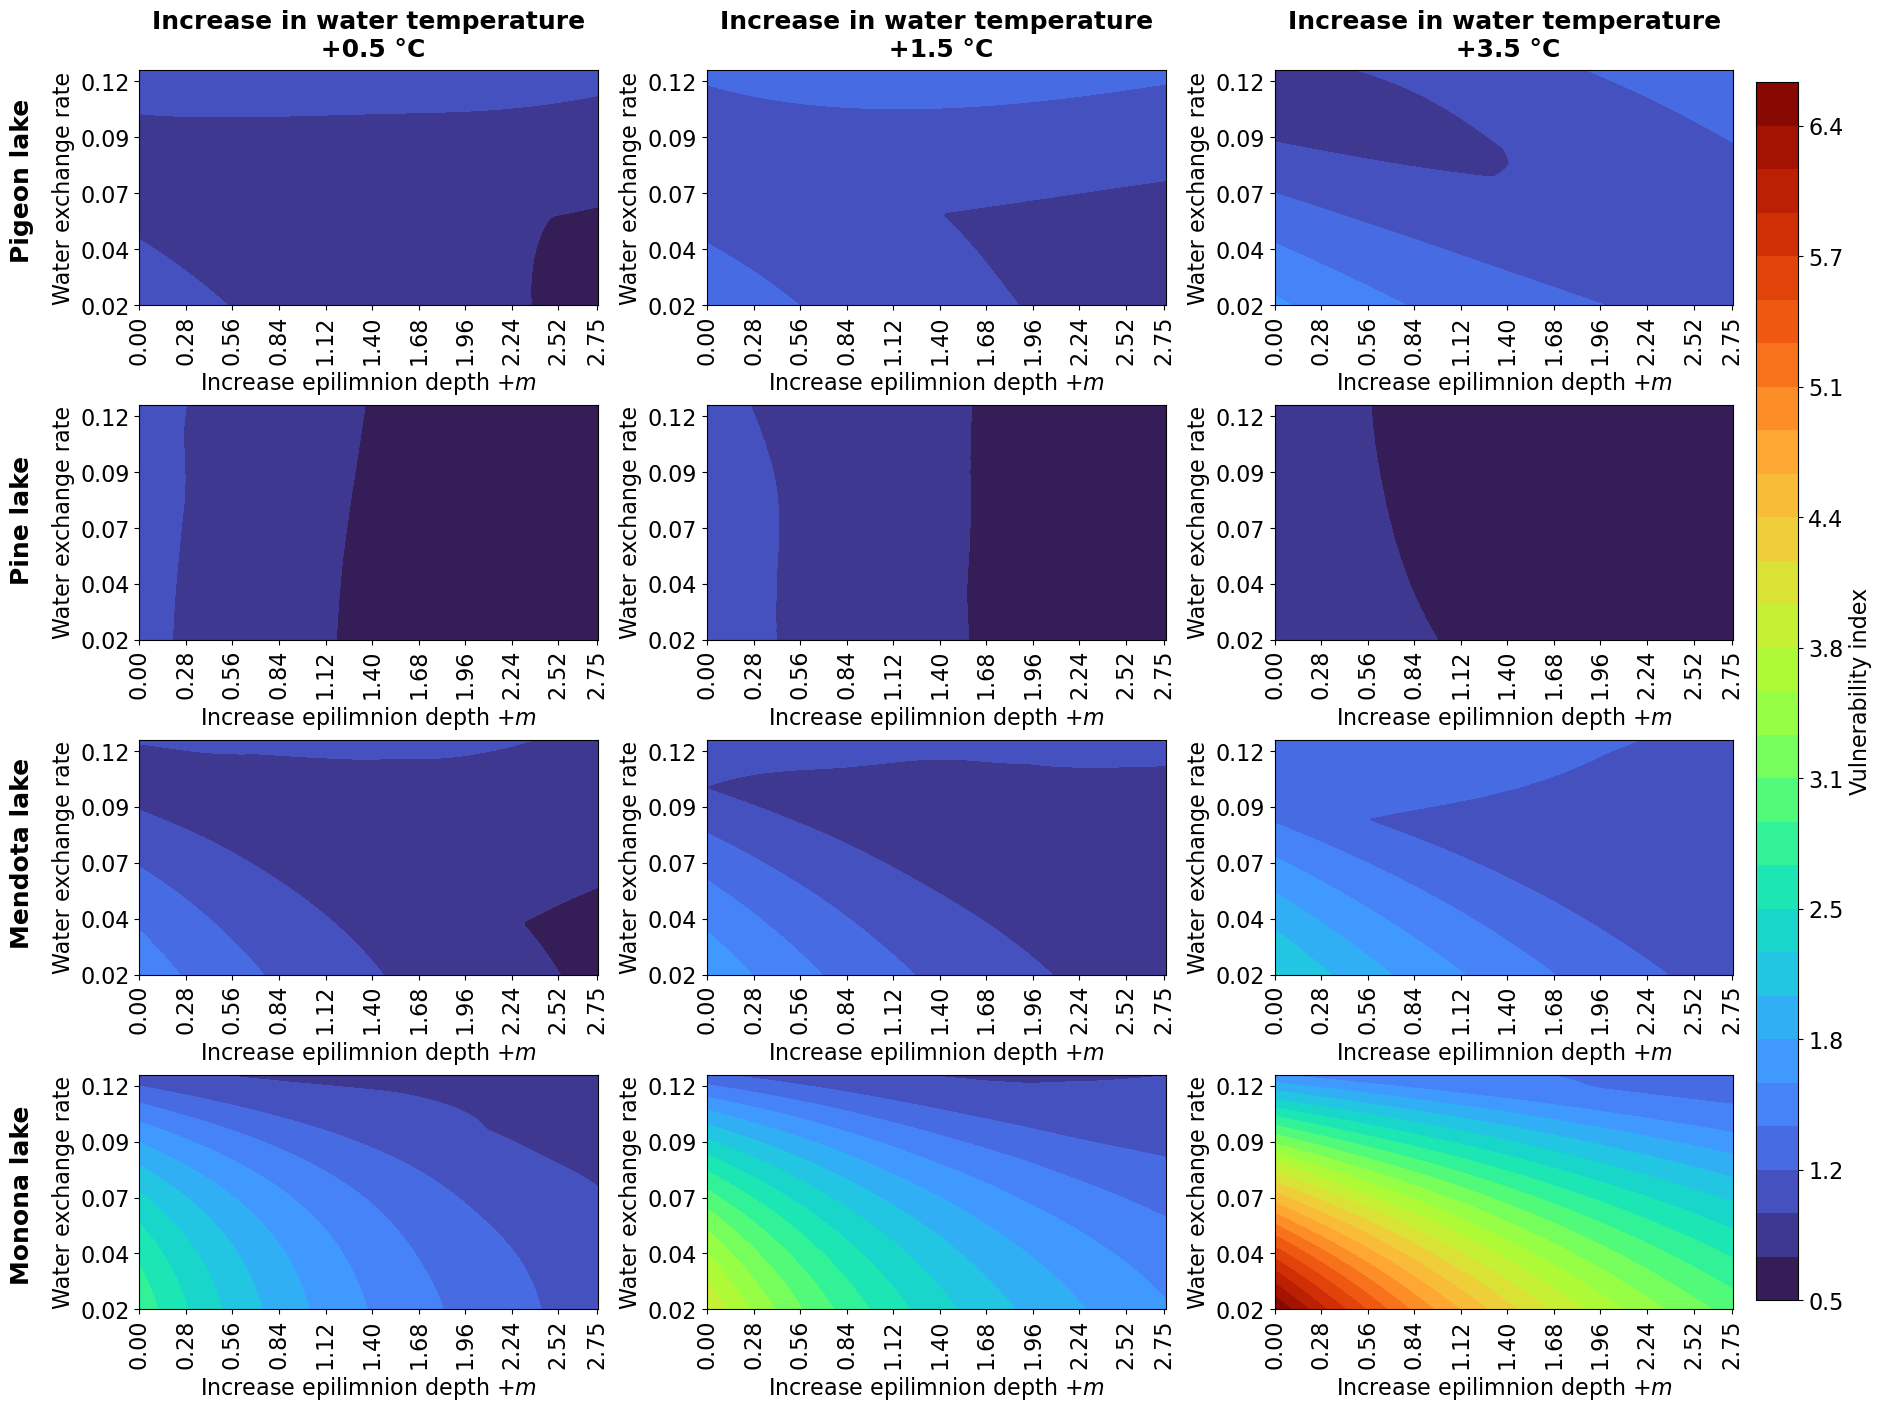

In [20]:
type = 'mean'
fig, axs = heatmap_value(custom_cmap = 'turbo', figsize=(17,14), FONTSIZE=16, type=type)
SAVEIMAGE = True
if SAVEIMAGE:
    path = "./Vulnerability/"
    name = 'Full_model_heat_zm_de_index_' + type
    FORMAT = '.pdf'
    plt.savefig(path+name+FORMAT, dpi=900, bbox_inches='tight')
plt.show()